In [1]:
import pandas as pd
import glob
import matplotlib.pyplot as plt


In [2]:
print("hello world")

hello world


In [29]:
folder = "../data/data_backup/download_2023-07-06_17-38-06/dump_2023-07-06_17-25-58"

for file in glob.glob(f"{folder}/*activities*.csv"):
    print(f"Considering the file `{file}`...")
    df = pd.read_csv(file, index_col=0)
    df.dt = pd.to_datetime(df.dt, utc=False)
    df.dt = df.dt.dt.tz_convert('Europe/London')
    df_day = df.groupby(df.dt.dt.date)
    break

Considering the file `../data/data_backup/download_2023-07-06_17-38-06/dump_2023-07-06_17-25-58/09AU_activities_2023-07-06_17-25-58.csv`...


In [33]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
from datetime import datetime

n days:  8


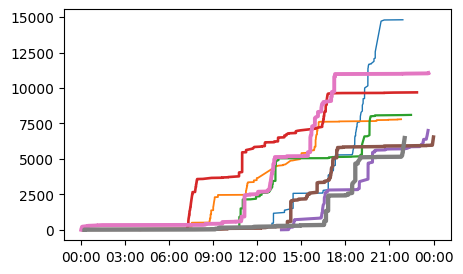

In [48]:
fig, ax = plt.subplots(figsize=(5, 3))
uniq_date = df.dt.dt.date.unique()

print("n days: ", len(uniq_date))

for date in uniq_date:
    df_date = df[df.dt.dt.date == date]
    min_date = df.dt.dt.date.min()
    n_days_since_beginning = (date - min_date).days
    x = df_date.dt.map(lambda x: x.replace(day=1, month=1, year=2000))

    y = df_date.step_midnight.values
    ax.plot(x, y, linewidth=1+(n_days_since_beginning)*0.3)

    xformatter = mdates.DateFormatter('%H:%M', )
    ax.xaxis.set_major_formatter(xformatter)

plt.show()

In [5]:
df.groupby(df.dt.dt.date).data.apply("list")

AttributeError: 'DataFrameGroupBy' object has no attribute 'data'